# PHYS 210, Homework 02
**Due:** Monday, Oct 23, 2023, at the start of class on Canvas

*Please note that unlike Homework 01, there is neither a first draft nor a dedicated feedback session in class for this assignment.*

## *The situation you are modelling using `solve_ivp`: comet close approach to the Earth*

We want to determine how close a hypothetical comet travelling in our solar system will come to Earth. Our measurements and current models give us a fairly precise picture of the comet's position and trajectory when it is approximately 3.5 AU from the Sun. As a citizen scientist, you decide to produce some visualizations related to the situation, as well as exploring how small errors in the comet's position or trajectory might impact how close the calculated approach will be.

## *Further details*

We will be working in units of AU (astronomical units), solar masses and years, where we have the following constants:
* G = 39.48 AU^3 M_sun^-1 year^-2
* M_earth = 3.003e-6 M_sun
* M_sun = 1.0 M_sun
* a_earth = 1.0 AU (average distance from the Earth to the sun)

To simplify the model, we will treat Earth as having a perfectly circular path with position
* $x = 1.0 \times \sin(2 \pi t) \mbox{ AU}$ , and
* $y = -1.0 \times \cos(2 \pi t) \mbox{ AU}$,

with $t$ being measured in years. The sun remains at the origin in this coordinate system. 

Our initial state vector for our comet is
* $x_0 = 3.5\mbox{ AU}$,
* $y_0 = 0.5\mbox{ AU}$,
* $v_{x0} = -6.0 \mbox{ AU/year}$, and
* $v_{y0} = -2.0 \mbox{ AU/year}$.

The figure below shows the time development of the Earth and comet's paths right up to the point when the comet crosses the Earth's path at 1 AU from the sun. Based on the range of initial conditions we will investigate, we will define the distance of closest approach to be the distance between the Earth and comet at this point when the comet crosses the Earth's path at 1 AU from the sun.

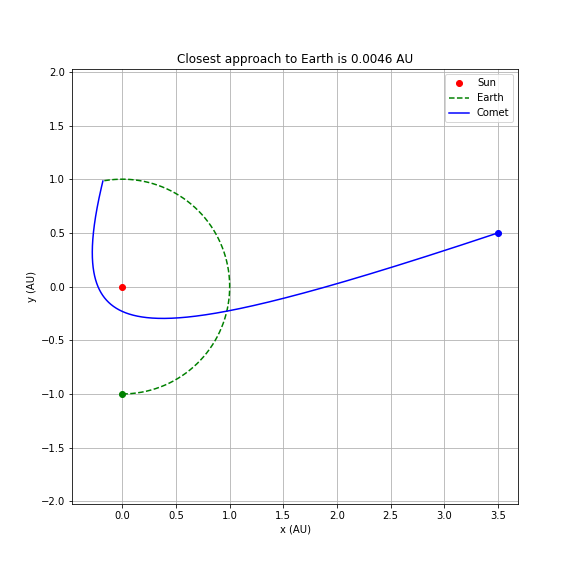

Finally, in our use of `solve_ivp()` to create this figure:
* We used the following `rtol` (relative toleranace) and `atol` (absolute tolerance) arguments to further improve the accuracy of our simulation:
```python
sol = solve_ivp(diff_eqns, .. , rtol=1e-9, atol=1e-9)
```
* We used a minimum of 5000 time steps per year.


A copy of the image above is also viewable at https://i.ibb.co/YRSvR0J/comet-path.png

## *Task 1:*

Your `comet_approach` function should be built so that you call it by giving it the initial state vector for your comet `[x, y, vx, vy]` and an optional Boolean flag. The two example calls below specify the behaviours the function should have based the state of the optional Boolean flag:
<br><br><br>
**Example 1:** The optional Boolean flag is `True`. Example:
```python
comet_approach( [3.5, 0.5, -6.0, -2.0], True )  # display plot but return no value
```
This call to `comet_approach` should display your visualization, but have no return value (meaning it should be a void function when the optional Boolean flag is `True`).
<br><br><br>
**Example 2:** The optional Boolean flag is absent or `False`. Example:
```python
d_approach = comet_approach( [3.5, 0.5, -6.0, -2.0] )  # return approach distance and display no plot
```
This call to `comet_approach` should not display your visualization and instead the function should return the distance of closest apprach between the comet and the Earth, defined earlier as the distance between the Earth and comet at the point when the comet is travelling away from the sun and crosses the Earth's path at 1 AU from the sun.

In the code box(es) below you should include all of the code infrastructure needed such that after they are run, a call to `comet_approach()` using either of the examples above would have the desired behaviour.
### Task 1 grade breakdowns
**Overall:** 1 point allocated to each of the following:
1. The gravitational forces from both the Sun and the Earth are used when calculating the acceleration of the comet
1. Choices are made when calling `solve_ivp` to keep accuracy high, such as using the arguments `rtol=1e-9` and `atol=1e-9` within `solve_ivp` and using at least 5000 time steps per year. However, you do not need to reproduce the exact closest approach distance values shown in any of our examples.

**Visualizations (optional boolean flag set to True):** 1 point allocated to each of the following:
1. When called with the optional Boolean flag set to True (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0], True )`), a visualization is produced without the call to the function needing to be further modified.
1. `comet_approach()` is a void function (returns no value) when called with the optional Boolean flag set to `True`
1. The graph conveys all trajectory information at an appropriate zoom level
1. The three ojects and their trajectories are plotted such that they can be distinguished from each other and clearly identified via the legend
1. There are appropriate axis titles
1. The closest approach distance is automatically updated and communicated through the plot title
1. The plotted trajectories end when the comet crosses the Earth's orbit (1AU) while travelling away from the sun.

**Return values (optional boolean flag set to False):** 1 point allocated to each of the following:
1. When called without the optional Boolean flag, (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0] )`) no plots are created
1. When called without the optional Boolean flag, (e.g., `comet_approach( [3.5, 0.5, -6.0, -2.0] )`) the closest approach distance is returned

In [ ]:
# Your code here



In [ ]:
# More code here as needed. Add as many code boxes as you need



### Task 1 visualization

Use only the function call below to produce your visualization. Your visualization should reproduce the same general features as the visualization we provided.

In [ ]:
# Run this cell without adding/modifying code to demonstrate your function's behaviour

comet_approach( [3.5, 0.5, -6.0, -2.0], True ) # display plot but return no value

### Task 1 return value

Use only the two lines below to return this information from your function and print it to the screen. 

In [ ]:
# Run this cell without adding/modifying code to demonstrate your function's behaviour

d_approach = comet_approach( [3.5, 0.5, -6.0, -2.0] )  # return approach distance and display no plot
print("The distance of closest approach for the initial conditions is",d_approach,"AU.")

## *Task 2: Investigate how the distance of closest approach depends on the initial x-position of the comet*

You are going to perform a phase space investigation related to the initial x-position of the comet, meaning that you will use a comet state vector `[x, 0.5, -6.0, -2.0]`, where you systematically use different values for `x` to determine the distance of closest approach as determined by your `comet_approach()` function and then you will plot the results. 

Create a graph in the style of the example shown below, but note that the one below was done for a phase-space investigation using initial y-velocity, so there will be important differences for your phase-space investigation using x-velocity. 

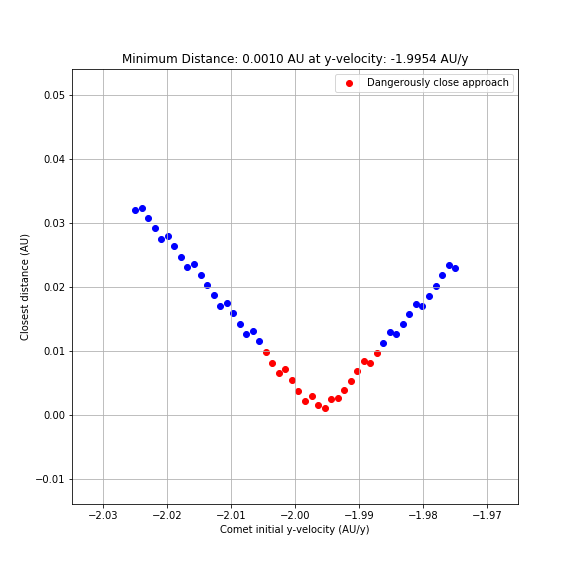

In your phase-space investigation:
* You should vary the initial x-position of the comet over some small range close to the initial state vector, while leaving the other variables in that initial state vector alone. 
* Pick a distance that you consider to be a dangerously close approach. We used a distance of 0.01 AU (approximately four times the average distance between the Earth and moon), but you may need to choose a higher value since your choices related to `solve_ivp` implementation may not have allowed your comet to get as close as in the examples provided. 
* Fine-tune the range for your x-positions in your phase-space investigation so that approximately 1/4 to 1/2 of the values that you will plot will be close than your dangerously close approach distance.
* Produce a plot in a similar style as the one we produced, where the x-positions that correspond to dangerously close approaches are indicated differently than those that don't
* Determine the minimum distance of closest approach and determine the initial x-position that corresponds to this smallest distance. Include these values on your graph. These values should be determined automatically by your code.

**Task 2 grade breakdown:** 1 point allocated to each of the following:
1. A graph of distance of closest approach vs x-position has been produced.
1. A visual cue has been provided to distinguish between the dangerously close distances of closest approach and those that weren't
1. The dangerously close distances represent approximately 1/4-1/2 of the plotted data points
1. The minimum distance of closest approach and its corresponding initial x-position have been indicated on the graph
1. For the previous point, these values were calculated automatically by your code.

In [ ]:
# Your code here



In [ ]:
# More code here as needed. Add as many code boxes as you need



## *Task 3: Please provide attribution for any help you received*
Detail any resources from which you took code snippets or code ideas, and any resources/people you used for help. These should include people, online resources and generative AI, such as ChatGPT.

*Your responses for Task 3 here*

..

## *Preparing for Quiz 02*

Quiz 02 on Monday, October 23rd will follow a format similar to Quiz 01. You will first copy in the code from your homework assignment, and then the remainder of the quiz will consist of extensions of your code. You should (1) make sure that you build your code in such a way that you can easily modify to account for new details and extensions, and (2) make sure that you have a very good understanding of how all aspects of your code work, whether you are using existing existing tools from the course or learning new ones beyond what we have covered so far.

Some examples of the types of changes, modifications or extensions that you might expect to see include:

* Modifying the way paths are shown in the visualization, such as using some array manipulation to plot a path as a motion diagram, which is a sequence of dots where the velocity is communicated by the distance between consecutively drawn dots. An example is shown below or is also viewable at https://i.ibb.co/mhnFhbf/motion-diagram.png
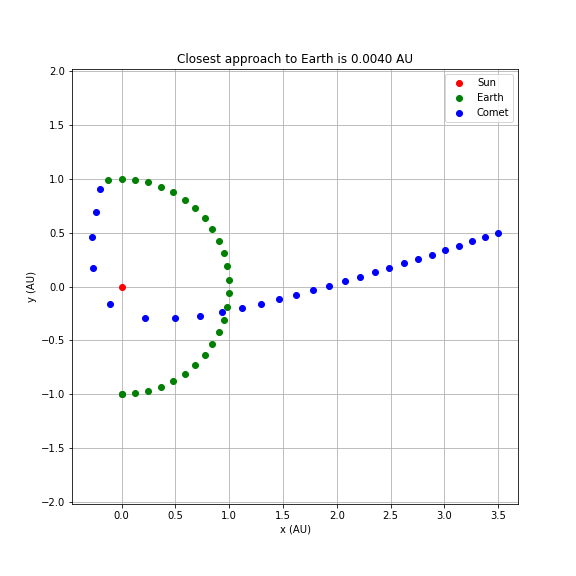

* Adding subplots showing other aspects of the motion, such as the distance between various objects, velocities, the acceleration of the comet and time

* Changing the event to a non-terminal event, meaning one that does not stop the simulation/solver when it occurs and then using `sol.t_event` and `sol.y_event` after `solve_ivp` has run. This could allow, for example, one to check the distance of closest approach when the comet is travelling toward the sun as well as when it is travelling away from the sun.

* Changing parameters such as the star's mass, the planet's orbit, the planet's mass or the comet's initial state vector

* Having the `comet_approach()` function return additional useful quantities or include different quantities (calculated by your code) on the visualization.

* Including additional optional flags in the function to add additional functionality to the `comet_approach()` function